In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def plot_figure(x, y, x_label, y_label, title=None, x_lim=None, y_lim=None, x_log_scale = False, y_log_scale = False, show=False, save_path=None): 
    
    fig_pixel_x, fig_pixel_y = 1440, 720
    fig_dpi = 200

    fig, ax = plt.subplots(figsize=(fig_pixel_x/fig_dpi, fig_pixel_y/fig_dpi), dpi=fig_dpi)
    
    ax.plot(x, y, 'bo-', linewidth=0.7)
    
    ax.set(xlabel=x_label, ylabel=y_label)
    if title: 
        ax.set(title=title)
    
    if x_lim: 
        ax.set_xlim(x_lim)
    if y_lim:
        ax.set_ylim(y_lim)
    
    if x_log_scale: 
        ax.set_xscale("log", nonposx='clip')
    if y_log_scale: 
        ax.set_yscale("log", nonposy='clip')
    
    if save_path:
        fig.savefig(save_path, transparent=False, dpi=fig_dpi)
    
    if show: 
        plt.show()

In [3]:
lr = pd.read_csv('../log/para_test_lr.log')

In [4]:
lr[lr.acc > 0.853].sort_values(by=['acc'], ascending=False).reset_index(drop=True)

,opt,norm,batch,l2_lambda,eta,acc
0,adam,min_max,500,0.0010,1.00,0.855344
1,adam,standard,10,0.0010,0.10,0.855037
2,adam,standard,100,0.0010,0.10,0.854115
3,ada,standard,50,0.0100,10.00,0.854115
4,adam,standard,500,0.1000,1.00,0.853501
5,adam,standard,500,0.0100,0.10,0.853501
6,adam,standard,10,0.0010,0.01,0.853194
7,adam,standard,500,0.0100,1.00,0.853194
8,adam,min_max,500,0.0001,1.00,0.853194
9,ada,standard,50,0.0001,10.00,0.853194


In [5]:
lr_1 = lr[(lr.opt == 'adam')&(lr.batch == 10)&(lr.l2_lambda == 0.001)&(lr.eta == 0.1)].reset_index(drop=True)
lr_2 = lr[(lr.opt == 'adam')&(lr.batch == 10)&(lr.l2_lambda == 0.001)&(lr.eta == 0.0001)].reset_index(drop=True)
lr_1, lr_2

(    opt      norm  batch  l2_lambda  eta       acc
 0  adam  standard     10      0.001  0.1  0.855037
 1  adam   min_max     10      0.001  0.1  0.846437
 2  adam      mean     10      0.001  0.1  0.845209
 3  adam      none     10      0.001  0.1  0.819717,
     opt      norm  batch  l2_lambda     eta       acc
 0  adam  standard     10      0.001  0.0001  0.851658
 1  adam   min_max     10      0.001  0.0001  0.842752
 2  adam      mean     10      0.001  0.0001  0.841523
 3  adam      none     10      0.001  0.0001  0.850737)

In [6]:
adam = lr[(lr.opt == 'adam')].reset_index(drop=True)
ada = lr[(lr.opt == 'ada')].reset_index(drop=True)

In [7]:
standard = lr[(lr.norm == 'standard')].reset_index(drop=True)
min_max = lr[(lr.norm == 'min_max')].reset_index(drop=True)
mean = lr[(lr.norm == 'mean')].reset_index(drop=True)
none = lr[(lr.norm == 'none')].reset_index(drop=True)

,opt,norm,batch,l2_lambda,eta,acc
0,adam,standard,10,0.001,10.00000,0.836916
1,adam,standard,10,0.001,1.00000,0.844287
2,adam,standard,10,0.001,0.10000,0.855037
3,adam,standard,10,0.001,0.01000,0.853194
4,adam,standard,10,0.001,0.00100,0.851966
5,adam,standard,10,0.001,0.00010,0.851658
6,adam,standard,10,0.001,0.00001,0.849509


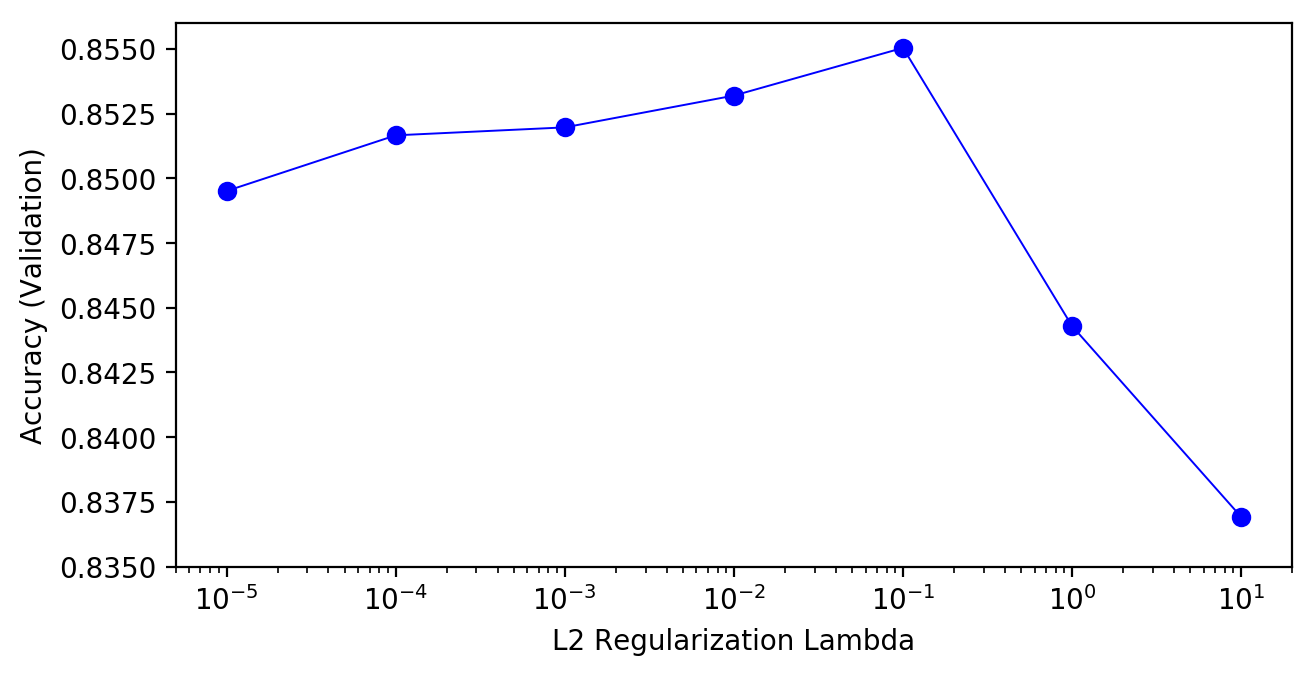

In [8]:
eta = lr[(lr.opt == 'adam')&(lr.batch == 10)&(lr.l2_lambda == 0.001)&(lr.norm == 'standard')].sort_values(by=['eta'], ascending=False).reset_index(drop=True)

plot_figure(eta['eta'], eta['acc'], 'L2 Regularization Lambda', 'Accuracy (Validation)', title=None, x_lim=None, y_lim=[0.835, 0.856], x_log_scale = True, y_log_scale = False, show=False, save_path=None)
eta

,opt,norm,batch,l2_lambda,eta,acc
0,adam,standard,10,0.1000,0.1,0.846744
1,adam,standard,10,0.0100,0.1,0.851351
2,adam,standard,10,0.0010,0.1,0.855037
3,adam,standard,10,0.0001,0.1,0.852580


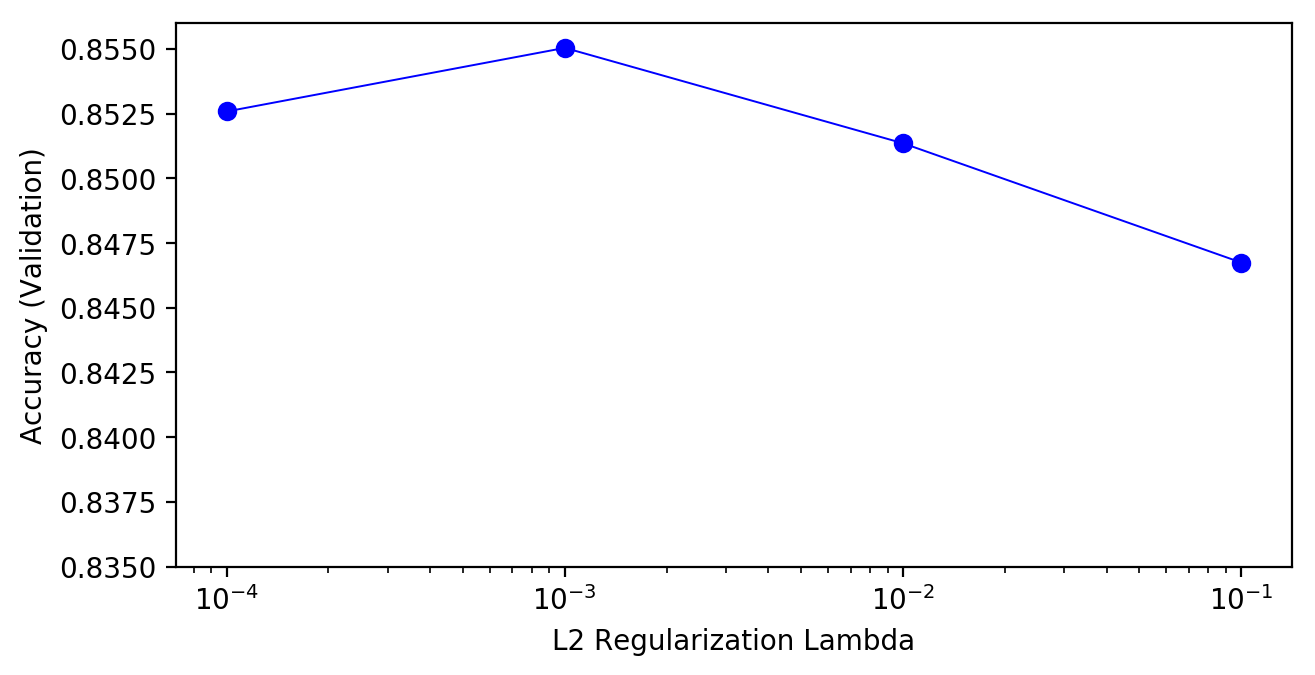

In [9]:
l2_lambda = lr[(lr.opt == 'adam')&(lr.batch == 10)&(lr.eta == 0.1)&(lr.norm == 'standard')].sort_values(by=['l2_lambda'], ascending=False).reset_index(drop=True)

plot_figure(l2_lambda['l2_lambda'], l2_lambda['acc'], 'L2 Regularization Lambda', 'Accuracy (Validation)', title=None, x_lim=None, y_lim=[0.835, 0.856], x_log_scale = True, y_log_scale = False, show=False, save_path=None)
l2_lambda